In [1]:
import os
%pylab inline 
import tensorflow as tf
import DifferentiableHOS as DHOS
import astropy.units as u
import pickle
from scipy import ndimage, misc
import os
from matplotlib import gridspec
import cmasher as cmr
import matplotlib.colors as colors

Populating the interactive namespace from numpy and matplotlib


In [2]:
field_size=5.
field_npix=1024
z_source=[0.255,0.462,0.462,0.914,1.302]

### Load DLL results 

In [3]:
mups_DLL_S7 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/mups_DLL_S7.npy'), axis=0)
mups_DLL_S12 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/mups_DLL_S12.npy'), axis=0)
mups_DLL_S16 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/mups_DLL_S16.npy'), axis=0)
mups_DLL_S21 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/mups_DLL_S21.npy'), axis=0)
mups_DLL_S27 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/mups_DLL_S27.npy'), axis=0)

stdps_DLL_S7 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/stdps_DLL_S7.npy'), axis=0)
stdps_DLL_S12 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/stdps_DLL_S12.npy'), axis=0)
stdps_DLL_S16 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/stdps_DLL_S16.npy'), axis=0)
stdps_DLL_S21 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/stdps_DLL_S21.npy'), axis=0)
stdps_DLL_S27 = stack(np.load('/global/homes/d/dlan/DifferentiableHOS/notebooks/summary_files/stdps_DLL_S27.npy'), axis=0)



## Comparison to kappa TNG

For comparison we use maps from the kappa TNG simulations at the following redshift:

 S7=0.255 
 
 S12=0.462
 
 S16=0.648
 
 S21=0.914
 
 S27=1.302

In [4]:
#S7
kTNG_S7=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa07.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S7.append(kappaTNG)
#S12
kTNG_S12=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa12.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S12.append(kappaTNG)
#S16
kTNG_S16=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa16.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S16.append(kappaTNG)
#S21
kTNG_S21=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa21.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S21.append(kappaTNG)
#S27
kTNG_S27=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa27.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S27.append(kappaTNG)

In [5]:
####
#S7
####
ps_kTNG_S7=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S7[i],field_size,field_npix)
    ps_kTNG_S7.append(ps)
####
#S12
####
ps_kTNG_S12=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S12[i],field_size,field_npix)
    ps_kTNG_S12.append(ps)
####
#S16
####
ps_kTNG_S16=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S16[i],field_size,field_npix)
    ps_kTNG_S16.append(ps)
####
#S21
####
ps_kTNG_S21=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S21[i],field_size,field_npix)
    ps_kTNG_S21.append(ps)
####
#S27
####
ps_kTNG_S27=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S27[i],field_size,field_npix)
    ps_kTNG_S27.append(ps)


In [6]:
mups_kTNG_S7=np.mean(ps_kTNG_S7,axis=0)
mups_kTNG_S12=np.mean(ps_kTNG_S12,axis=0)
mups_kTNG_S16=np.mean(ps_kTNG_S16,axis=0)
mups_kTNG_S21=np.mean(ps_kTNG_S21,axis=0)
mups_kTNG_S27=np.mean(ps_kTNG_S27,axis=0)

In [7]:
col = cmr.pride(np.linspace(0.,1,6))   

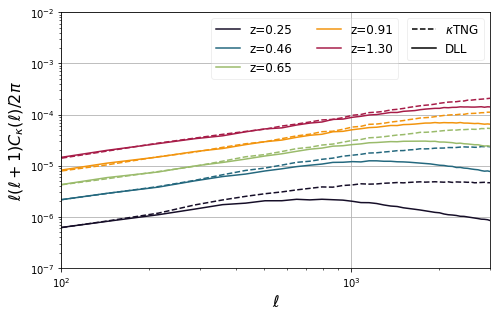

In [8]:
fig = plt.figure(figsize=(7, 4.5))
ax = fig.add_subplot(111)
a,=loglog(l, l*(l+1)*mups_kTNG_S7/(2*np.pi),'--',color=col[0])
loglog(l, l*(l+1)*mups_kTNG_S12/(2*np.pi),'--',color=col[1])
loglog(l, l*(l+1)*mups_kTNG_S16/(2*np.pi),'--',color=col[2])
loglog(l, l*(l+1)*mups_kTNG_S21/(2*np.pi),'--',color=col[3])
loglog(l, l*(l+1)*mups_kTNG_S27/(2*np.pi),'--',color=col[4])

b,=loglog(l, l*(l+1)*mups_DLL_S7/(2*np.pi), label='z=0.25',color=col[0])
loglog(l, l*(l+1)*mups_DLL_S12/(2*np.pi),label='z=0.46',color=col[1])
loglog(l, l*(l+1)*mups_DLL_S16/(2*np.pi),label='z=0.65',color=col[2])
loglog(l, l*(l+1)*mups_DLL_S21/(2*np.pi),label='z=0.91',color=col[3])
loglog(l, l*(l+1)*mups_DLL_S27/(2*np.pi),label='z=1.30',color=col[4])
ylabel('$\ell(\ell+1)C_{\kappa}(\ell) /2\pi$',fontsize=16)
plt.grid(True)
xscale('log')
xlim(1e2,3e3)
ylim(1e-7,1e-2)
xlabel('$\ell$',fontsize=16)
legend(fontsize='large')
plt.tight_layout()


leg1 = ax.legend(loc='upper right',fontsize='large',bbox_to_anchor=(0.8, 1.),ncol=2,framealpha=0.3)
leg2 = ax.legend([a,b],['$\kappa$TNG', 'DLL'],loc='upper right',fontsize='large',framealpha=0.3)
leg = ax.get_legend()
[leg2.set_color('black') for leg2 in leg.legendHandles]
ax.add_artist(leg1)


#plt.savefig('../figures/cls_DLL_vs_ktng.pdf',bbox_inches='tight')

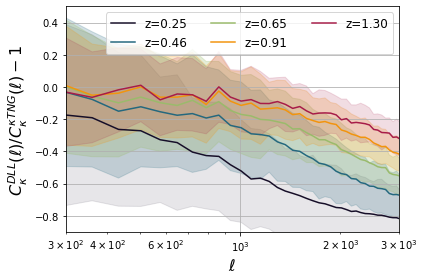

In [9]:
fig, ax = plt.subplots()
plt.semilogx(l,mups_DLL_S7/mups_kTNG_S7-1, label='z=0.25',color=col[0])
plt.semilogx(l,mups_DLL_S12/mups_kTNG_S12-1, label='z=0.46',color=col[1])
plt.semilogx(l,mups_DLL_S16/mups_kTNG_S16-1, label='z=0.65',color=col[2])
plt.semilogx(l,mups_DLL_S21/mups_kTNG_S21-1, label='z=0.91',color=col[3])
plt.semilogx(l,mups_DLL_S27/mups_kTNG_S27-1, label='z=1.30',color=col[4])
plt.grid(True)
xlim(3e2,3e3)
ylim(-0.9,0.5)
ax.fill_between(l, ((mups_DLL_S7/mups_kTNG_S7)-1)-(stdps_DLL_S7/mups_DLL_S7), ((mups_DLL_S7/mups_kTNG_S7)-1)+(stdps_DLL_S7/mups_DLL_S7), alpha=.1,color=col[0])
ax.fill_between(l, ((mups_DLL_S12/mups_kTNG_S12)-1)-(stdps_DLL_S12/mups_DLL_S12), ((mups_DLL_S12/mups_kTNG_S12)-1)+(stdps_DLL_S12/mups_DLL_S12), alpha=.2,color=col[1])
ax.fill_between(l, ((mups_DLL_S16/mups_kTNG_S16)-1)-(stdps_DLL_S16/mups_DLL_S16), ((mups_DLL_S16/mups_kTNG_S16)-1)+(stdps_DLL_S16/mups_DLL_S16), alpha=.25,color=col[2])
ax.fill_between(l, ((mups_DLL_S21/mups_kTNG_S21)-1)-(stdps_DLL_S21/mups_DLL_S21), ((mups_DLL_S21/mups_kTNG_S21)-1)+(stdps_DLL_S21/mups_DLL_S21), alpha=.2,color=col[3])
ax.fill_between(l, ((mups_DLL_S27/mups_kTNG_S27)-1)-(stdps_DLL_S27/mups_DLL_S27), ((mups_DLL_S27/mups_kTNG_S27)-1)+(stdps_DLL_S27/mups_DLL_S27), alpha=.15,color=col[4])
ylabel('$C_{\kappa}^{DLL}(\ell)/C_\kappa^{\kappa TNG}(\ell)-1$',fontsize=16)
xlabel('$\ell$',fontsize=16)
legend(fontsize='large',ncol=3,loc='upper right')
plt.tight_layout()
#plt.savefig('../figures/res_cls_DLL_vs_ktng.pdf',bbox_inches='tight')


